Временные ряды - финальный проект
====

Основное задание
---

В данном проекте главной задачей будет построить алгоритм, определяющий поиски аномалий.

Можно так же сделать симуляцию своей системы, то есть проверить, как система работала бы в продакшине, какие данные она бы использовала для перетренировки и как часто эта перетренировка бы соврешалась.

**На выбор** у вас два датасета. Один имеет много данных, а второй  временной ряд наоборот, содержат в себе еще очень мало информации. Вы так же можете использовать и другие датасеты из тех, что у вас есть в доступе на гитхабе. Но тогда вам прийдется сформулировать и ту задачу, которую вы пытаетесь решить, а именно пояснить, зачем в данном случае нам нужен поиск аномалий и как это будет применено на практике. 


Датасеты
------

Пассажиропоток нью-йоркского такси
--


In [62]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import statsmodels.tsa.stattools as ts
from sklearn.ensemble import IsolationForest
df = pd.read_csv('C:\\Users\\Alex\\rd\\l10\\nyc_taxi.csv')


Данные за период с Июля, 2014 года по Январь, 2015. Агрегированы с интервалом в 30 минут.

Задание:
---

* Агрегировать данные по 1 часу
* Построить алгоритм определения аномалий с задержкой в 24 часа

In [63]:
df['timestamp'] = pd.to_datetime(df['timestamp'])
df.set_index('timestamp',inplace=True)
df = df.resample('H').sum().dropna()

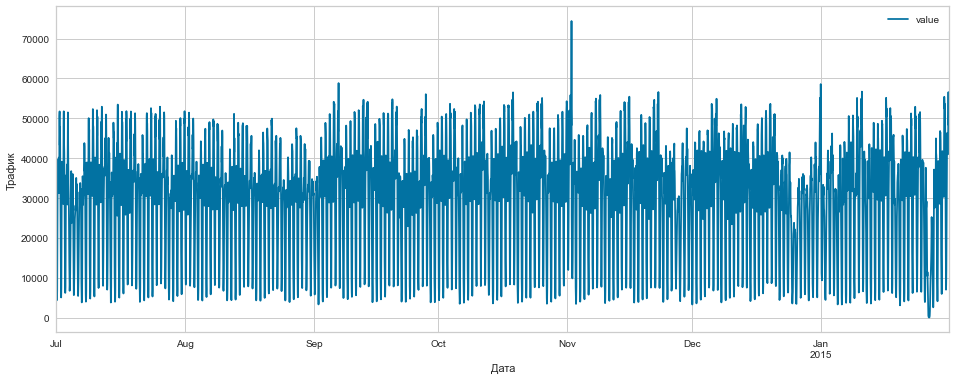

In [64]:
df.plot(y='value', figsize=(16,6))
plt.xlabel('Дата')
plt.ylabel('Трафик')
plt.plot(df)
plt.show()

Используем алгоритм изолирующих деревьев (IsolationForest).

# Определение аномалий

In [68]:
outliers_fraction = float(.01)

model =  IsolationForest(contamination=outliers_fraction)
model.fit(df)
df['anomaly'] = model.predict(df)

df['anomaly'].tail(12)

timestamp
2015-01-31 12:00:00    1
2015-01-31 13:00:00    1
2015-01-31 14:00:00    1
2015-01-31 15:00:00    1
2015-01-31 16:00:00    1
2015-01-31 17:00:00    1
2015-01-31 18:00:00    1
2015-01-31 19:00:00   -1
2015-01-31 20:00:00    1
2015-01-31 21:00:00    1
2015-01-31 22:00:00    1
2015-01-31 23:00:00    1
Freq: H, Name: anomaly, dtype: int32

# Визуализация

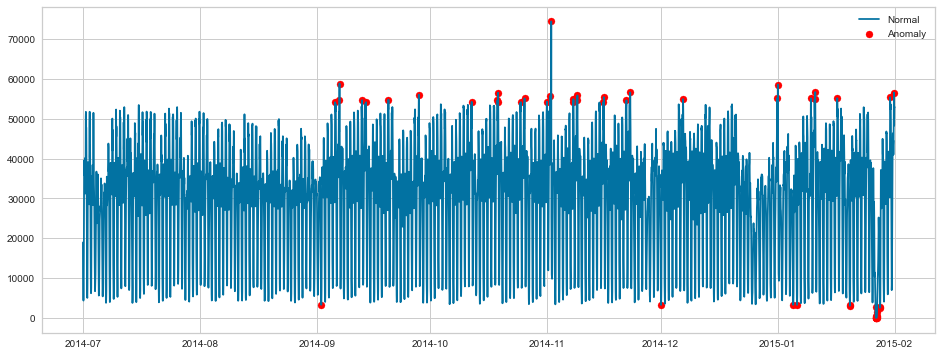

In [66]:
fig, ax = plt.subplots(figsize=(16,6))
a = df.loc[df['anomaly'] == -1, ['value']]
ax.plot(df.index, df['value'], label = 'Normal')
ax.scatter(a.index,a.value, color='red', label = 'Anomaly')
plt.legend()
plt.show();

In [70]:
 model.score_samples(df.tail(12))

array([-0.48588515, -0.48561623, -0.491511  , -0.49434394, -0.47717216,
       -0.49246623, -0.63142912, -0.82239584, -0.49541049, -0.49563115,
       -0.61657747, -0.61228778])

Isolation Forest чувствителен к глобальным выбросам и слабо справляется с локальными выбросами





Общие рекомендации
------
* Старайтесь описывать свои шаги, чтобы ход ваших мыслей был понятным
* Выбор модели остается за вами
* Опишите плюсы и минусы вашей модели
* Опишите дальнейшие действия - как бы вы дальше улучшили проект, какие данные еще бы использовали

Критерии оценки
-----
* Отсутсвтие ошибок в коде и багов
* Обоснованный выбор модели
* Четкое описание действий, хороший отчет
* Приветствуются техники кросс-валидации и симуляции системы